<h1 style="color:green;">Title of ML Project: Dry Bean Class Prediction Model</h1>

**Name: Neethu Mathew**

**Organization: Entri Elevate**

1. **Overview of Problem Statement:**


The analysis of the Dry Bean Dataset is important not only for its direct applications in agriculture but also as a tool for advancing the fields of machine learning, pattern recognition, and automated classification systems. It supports the development of more efficient, automated agricultural systems and contributes to data-driven decision-making in crop production and quality control.

2. **Objective:**



The objective of the Dry Bean Dataset is to classify different types of dry beans based on their physical and geometrical properties to improve accuracy in automated sorting, grading, and quality control processes in agriculture

3. **Data Description:**

- Source: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
            The Dry Bean Dataset is sourced from the UCI Machine Learning Repository, a well-known collection of datasets for machine learning research and development. The dataset was created as part of a study aimed at classifying different types of dry beans based on their physical and geometrical properties using image processing techniques.


- Features:
  
               Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

1. Area - (A), The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter - (P), Bean circumference is defined as the length of its border.
3. MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
4. MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. AspectRatio - (K), Defines the relationship between L and l :K = L/l
6. Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region
7. ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area: Ed=  √(4Aπ)
9. Extent - (Ex), The ratio of the pixels in the bounding box to the bean area Ex = A / AB  where AB = Area of bounding rectangle.
10.  Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans: S= A/C
11.  Roundness - (R), Calculated with the following formula: R = 4πA / P<sup>2</sup>
12.  Compactness - (CO), Measures the roundness of an object: CO = E<sub>d</sub> / L
13.  ShapeFactor1 - (SF1) calculated with the following formula: SF1 = L / A
14.  ShapeFactor2 - (SF2) Calculated with the following formula: SF2 = l/A
15.  ShapeFactor3 - (SF3) Calculated with the following formula: SF3 = A/((L/2.L/2.π))
16.  ShapeFactor4 - (SF4) Calculated with the following formula: SF4 = A/((L/2.l/2.π))
17.  y, the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.2


The general features of the specified dry beans are as follows:

Barbunya: Beige-colored background with red stripes or variegated, speckled color, its seeds are large, physical shape is oval close to the round.

Bombay: It is white in color, its seeds are very big and its physical structure is oval and bulging.

Cali: It is white in color, its seeds are slightly plump and slightly larger than dry beans and in shape of kidney.

Dermason: This type of dry beans, which are fuller flat, is white in color and one end is round and the other ends are round.

Horoz: Dry beans of this type are long, cylindrical, white in color and generally medium in size.

Seker: Large seeds, white in color, physical shape is round.

Sira: Its seeds are small, white in color, physical structure is flat, one end is flat, and the other end is round.

In [4]:
from IPython.display import Image
from IPython.display import display

# Display image from a URL
img = Image(url='https://i.ibb.co/9hb9jKh/Capture.jpg')
display(img)

4. **Data Collection:**
   
        Data has already been provided and imported. Next, we gained insights into the data distribution and patterns through initial checks and will continue with further analysis.

5. **Exploratory Data Analysis:**

In [7]:
#Basic Libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import rankdata, norm
from scipy import stats
from imblearn.over_sampling import RandomOverSampler

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
# Load the dataset
Bean_df = pd.read_csv("Dry_Bean_Dataset new.csv")

In [9]:
#to print first 5 rows
Bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [12]:
#To print last 5 rows
Bean_df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [13]:
#To print information about the dataset
Bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

It is visible that total rows are 13611 and columns are 17. The features are in 3 different datatypes, float64(14), int64(2), object(1).

In [14]:
#checking for null values
Bean_df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

No null values present in the dataset.

In [10]:
# Find and display all duplicated rows in the Dry Bean Dataset
duplicated_rows = Bean_df[Bean_df.duplicated(keep=False)]
print("Duplicated rows in Dry Bean Dataset:")
print(duplicated_rows)

Duplicated rows in Dry Bean Dataset:
       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
5504  33518    702.956       277.571399       154.305581      1.798842   
5505  33518    702.956       277.571399       154.305581      1.798842   
5508  33954    716.750       277.368480       156.356326      1.773951   
5509  33954    716.750       277.368480       156.356326      1.773951   
5547  38427    756.323       306.533886       160.591784      1.908777   
...     ...        ...              ...              ...           ...   
7285  63948    996.497       412.297178       198.877557      2.073121   
7339  65766   1035.842       406.416622       207.242369      1.961069   
7340  65766   1035.842       406.416622       207.242369      1.961069   
7341  65781   1039.257       409.713859       204.992832      1.998674   
7342  65781   1039.257       409.713859       204.992832      1.998674   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundne

In [11]:
Bean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860154
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


The features vary greatly in scales, scaling maybe required.

In [15]:
#find out the distribution of Target 
Bean_df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

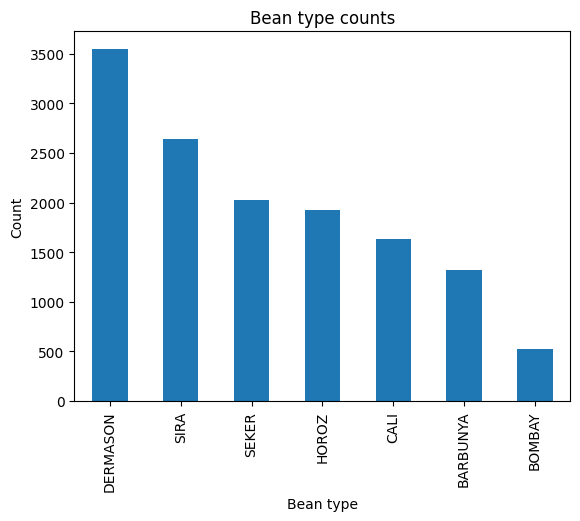

In [19]:
Bean_df["Class"].value_counts().plot(kind='bar',
                                   title= "Bean type counts",
                                   xlabel= 'Bean type',
                                   ylabel= 'Count');

-> There's an imbalance between the count of each class.

-> Dermason is the most frequent class. (2837)

-> Bombay is the least frequent class. (418)

Univariate Analysis:

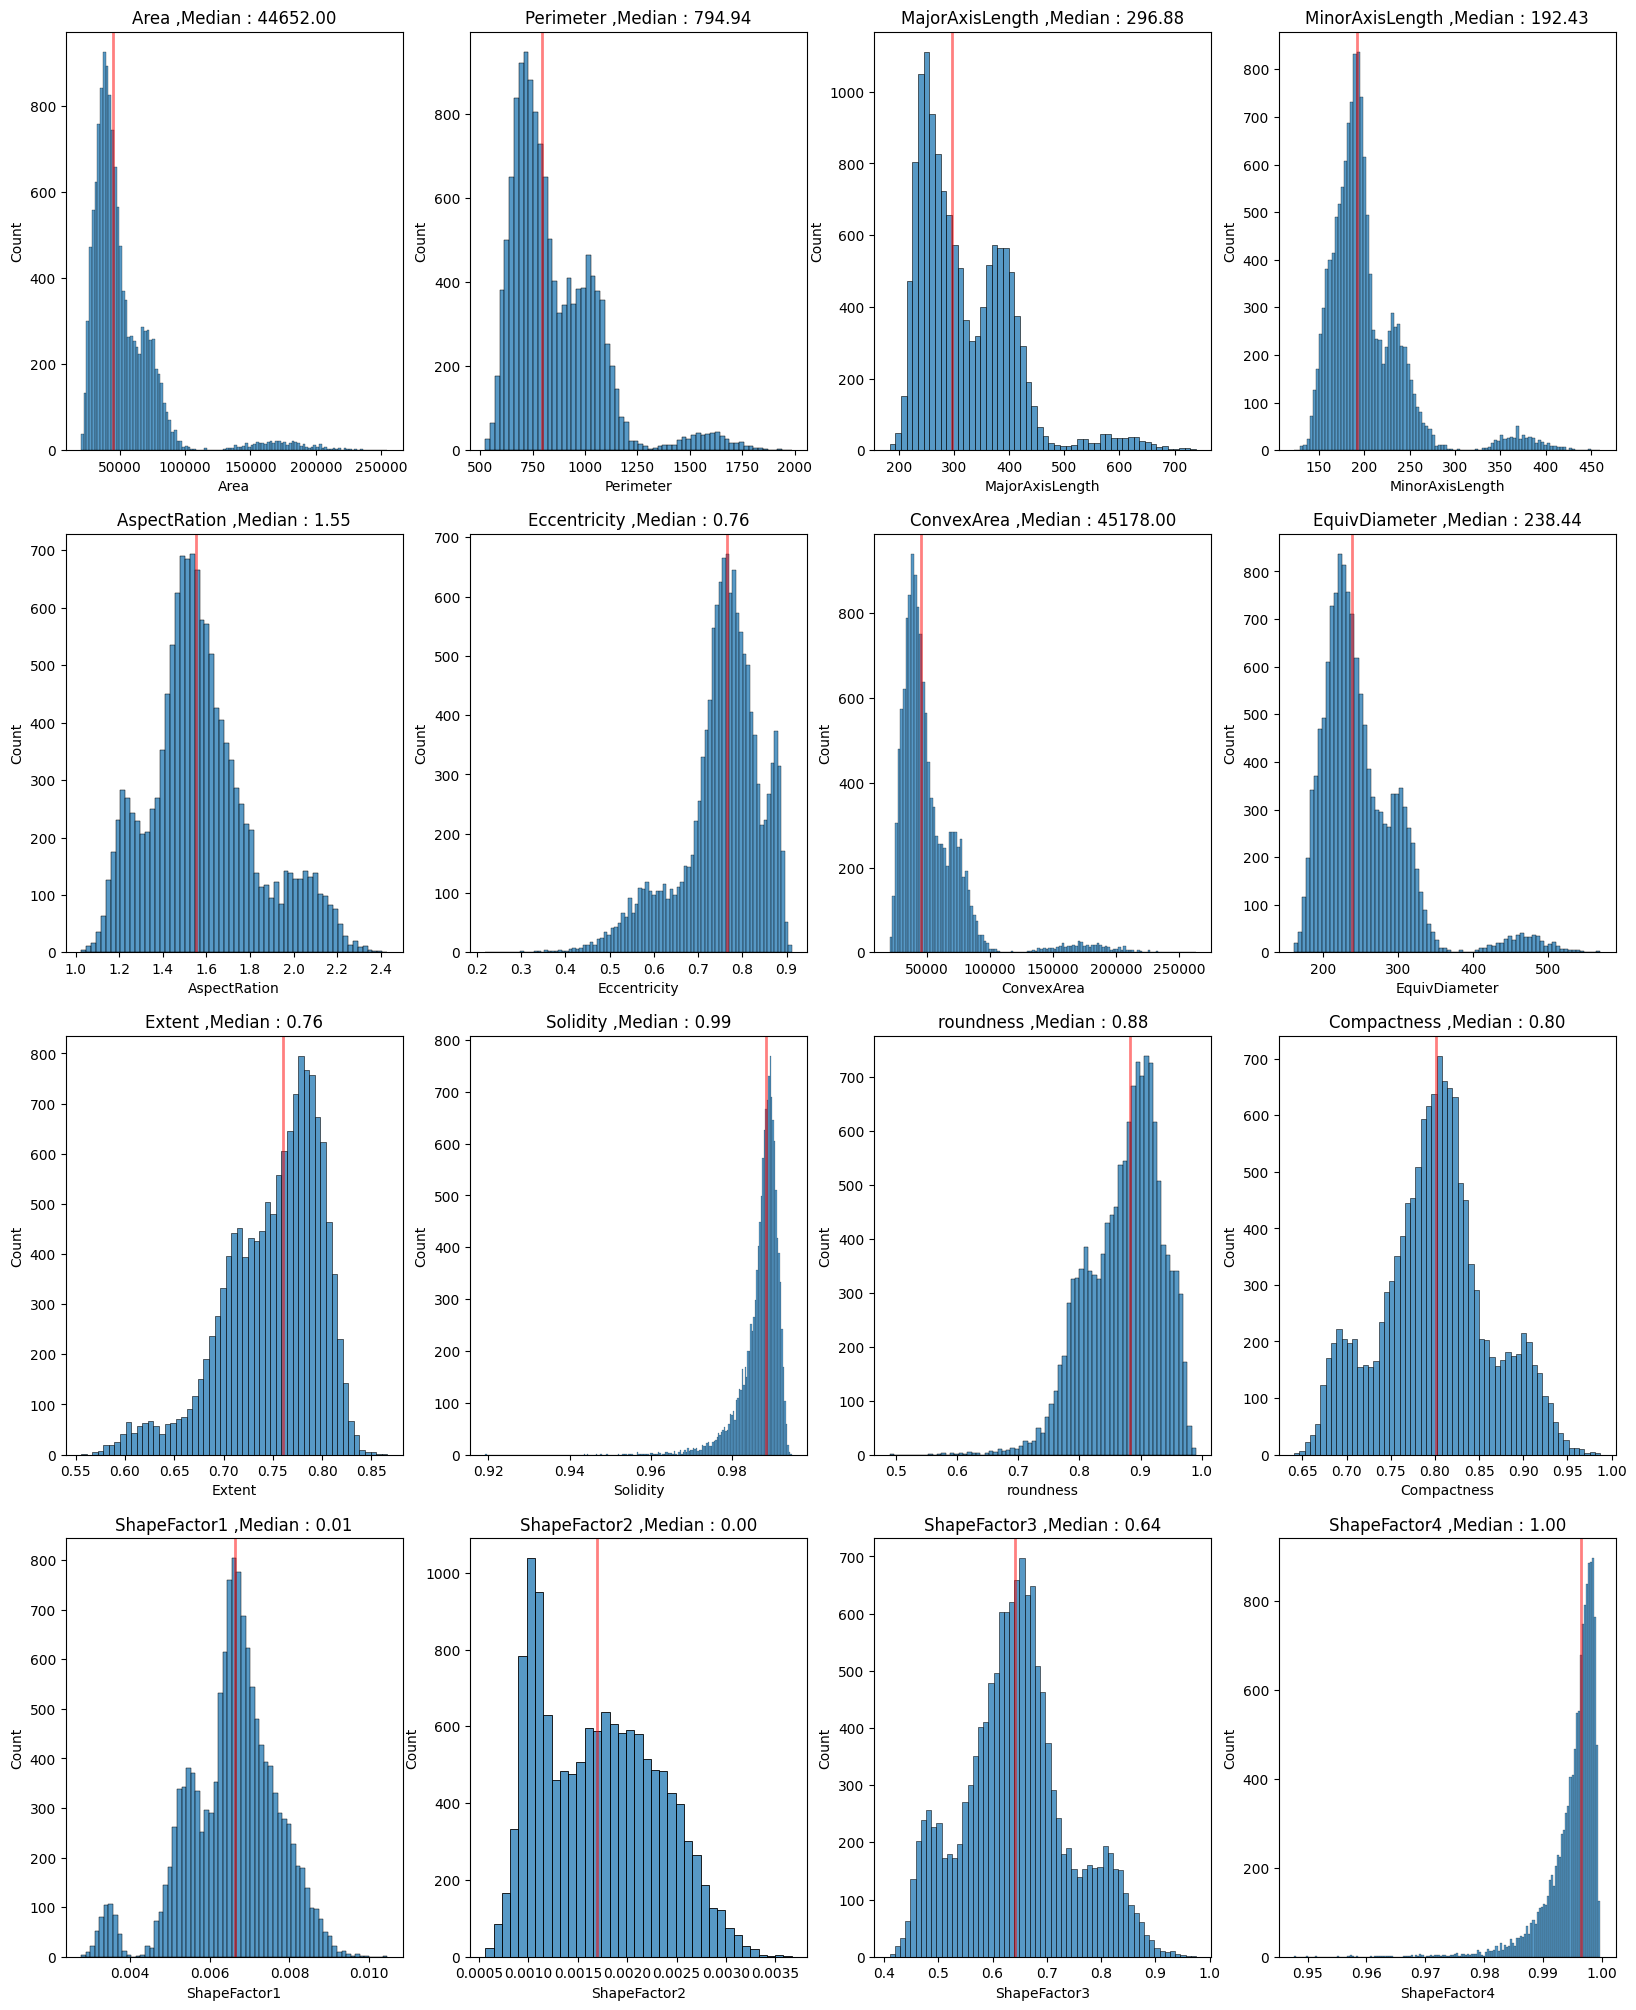

In [25]:
fig, axes = plt.subplots(4, 4, figsize=(20, 25))
for feature, ax in zip(Bean_df.columns.drop("Class"), axes.flatten()):
    sns.histplot(data=Bean_df[feature],ax=ax)
    median = Bean_df[feature].median()
    ax.set_title( f'{feature} ,Median : {median:0.2f}')
    ax.axvline(median,
               color ='red', 
               lw=2, 
               alpha=0.5)
plt.show()

-> It is clear that some features have long tails in their distribution.

-> Some features, Solidity and Shapefactor 4, Eccentricity, roundness are rightly skewed. Some of them are left skewed and rest of them are not skewed but shows multimode.
-> We should investegate the distribution of each feature with respect to the classes of the dry beans.

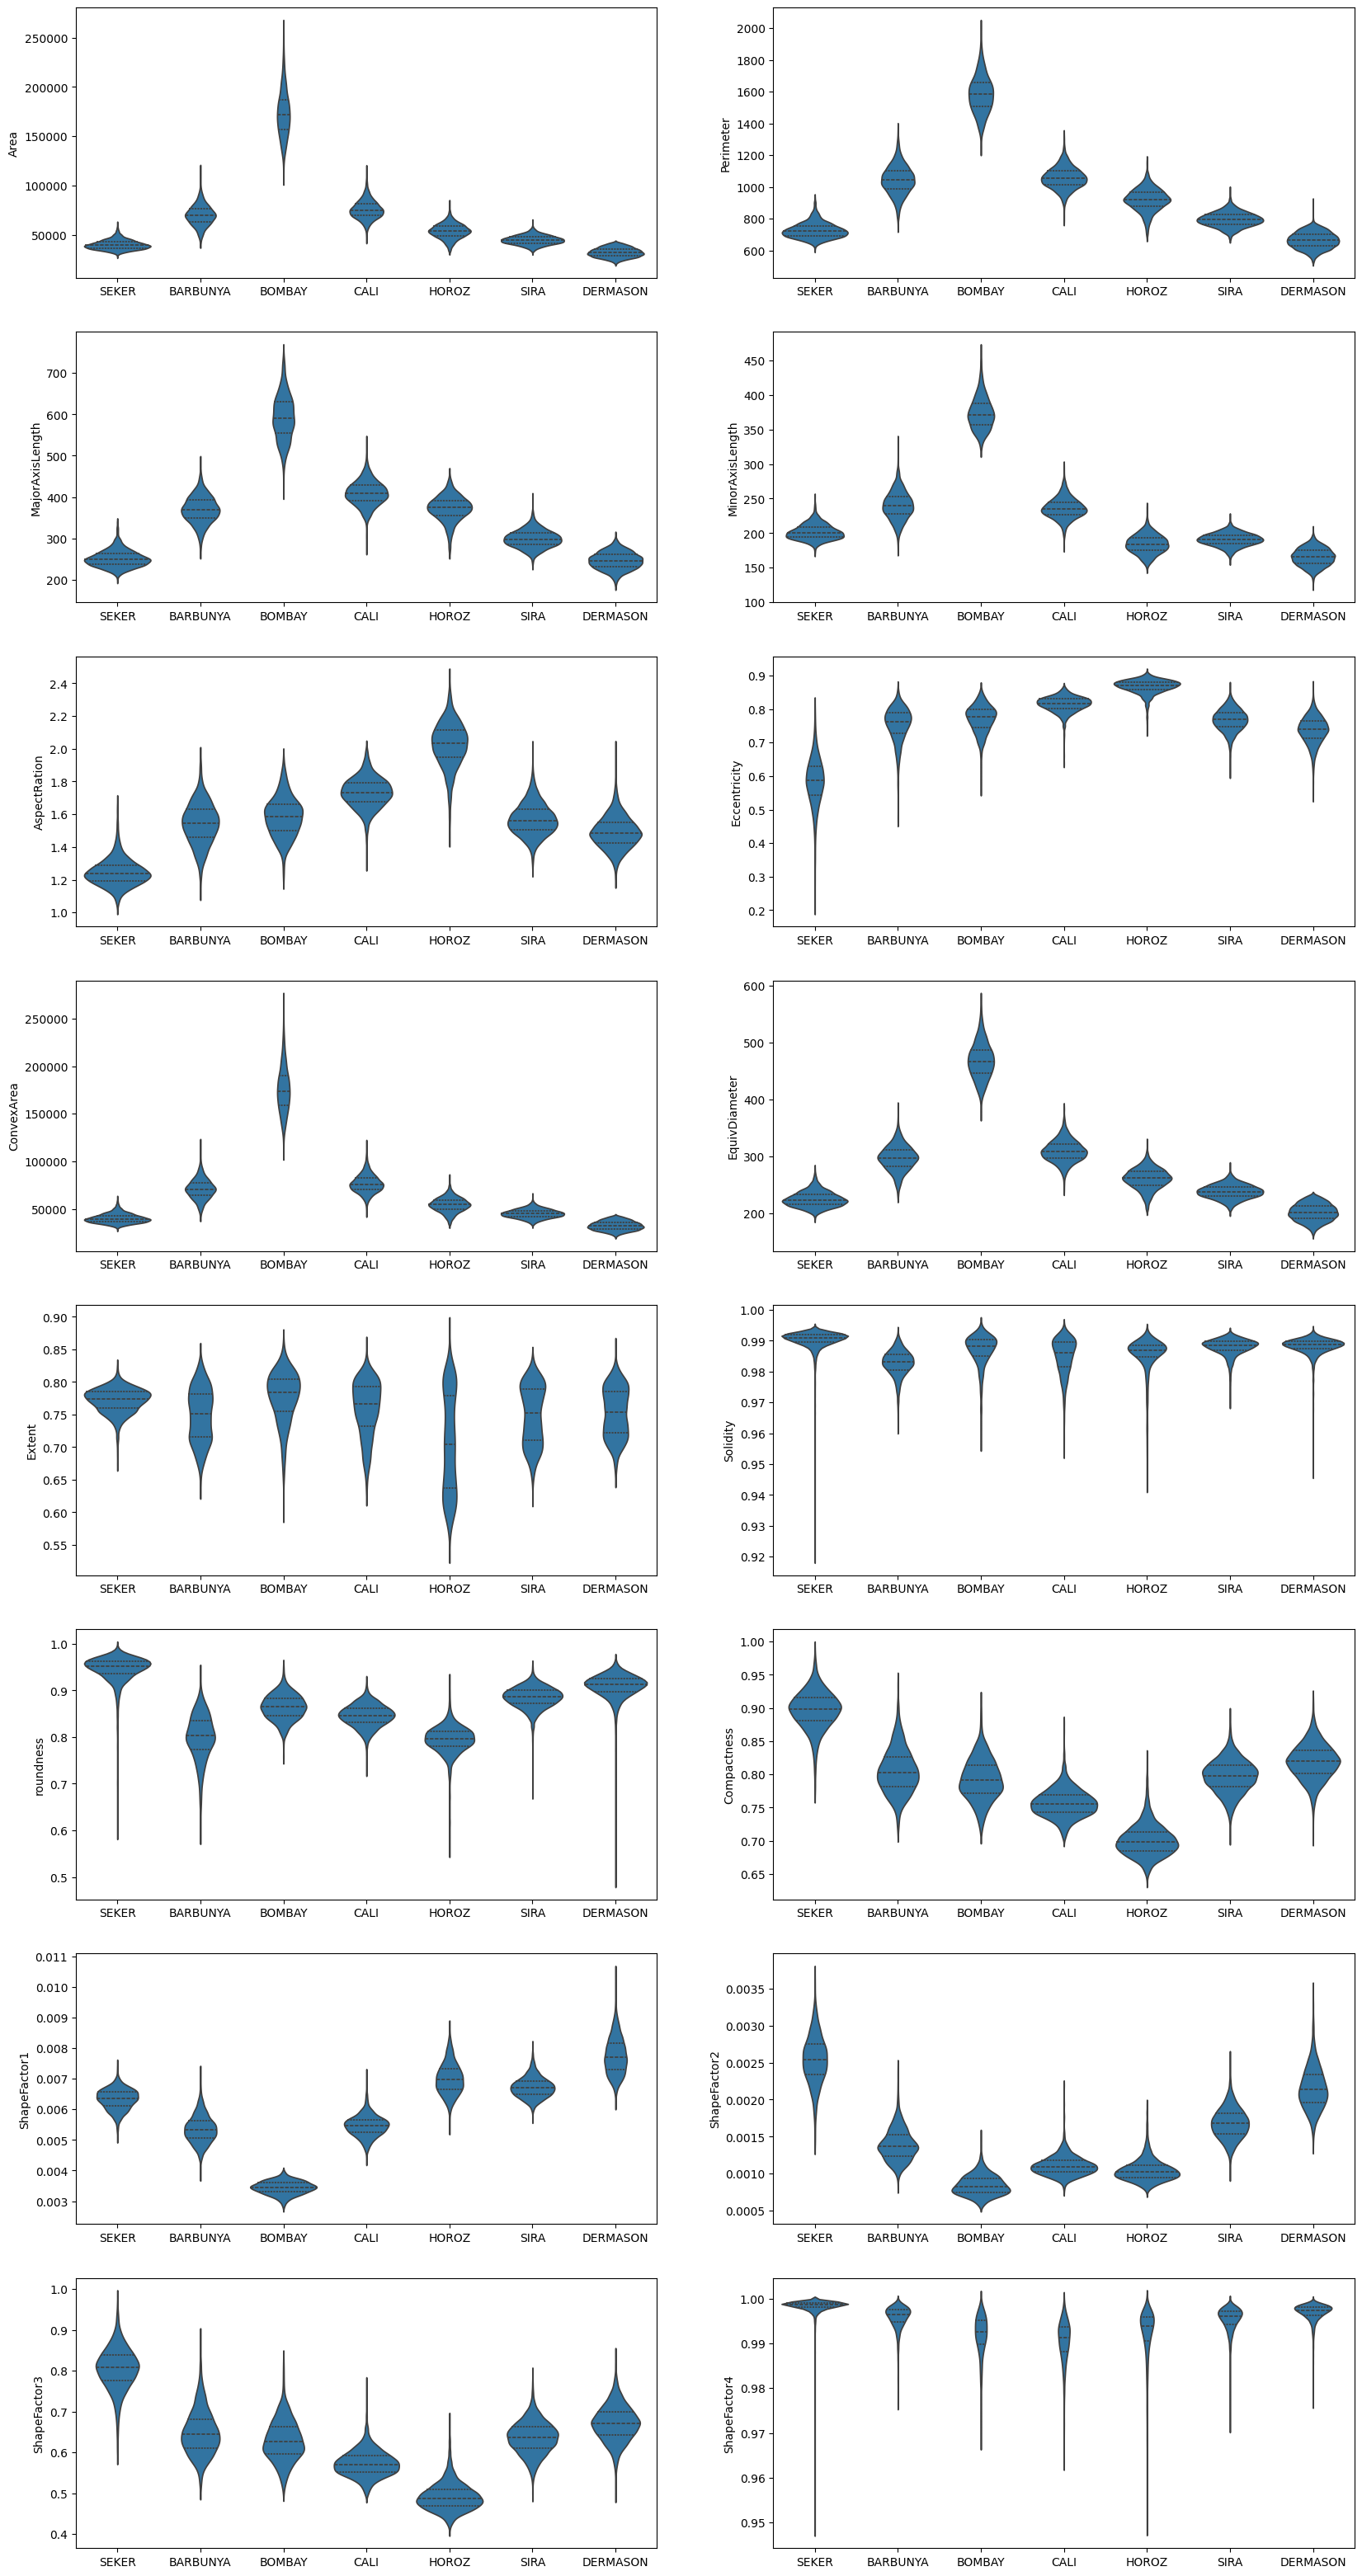

In [12]:
fig, axes = plt.subplots(8, 2, figsize = (20, 40))
for feature, ax in zip(Bean_df.columns.drop("Class"), axes.flatten()):
    sns.violinplot(data=Bean_df,
                   x="Class",
                   y=feature,
                   inner="quartile",
                   ax=ax)
    ax.set(xlabel=None)
plt.show()



-> Some features have a very skewed distribution with long tails (eccentricity, solidity, roundness, shape factor2, shape factor4)
-> 
Bombay class differs greatly from other classes, it has a larger area and perimeter, and can be clearly distinguished from other classes based o  Minor Axis Length (>310) and Shape Factor 1 (<0.0041)

.-> 
Both Barbunya class and Cali class have similar distributions and values in many features (area, minor axis length, equivalent diamete, shape factor1), which may lead to mislabeling o as the other.


-> .
Dermason class is similar to Seker class in some features, and Sira class in other features. It may be a difficult class to label accurately!

6. **Data Preprocessing - Data Cleaning:**


  - Handle missing values using appropriate imputation techniques.
        In the above steps, it is clear that there are no null values present in the dataset.


In [70]:
Bean_df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

- Balancing the imbalanced data

In [71]:
# Separate features and target variable
X = Bean_df.drop('Class', axis=1)
y = Bean_df['Class']

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

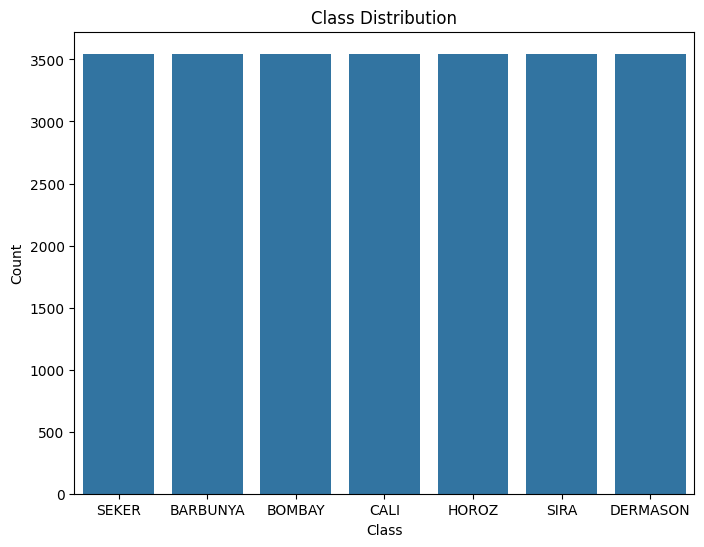

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Class",data=data_resampled)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

 - Check for and remove outliers using statistical methods.


In [80]:
data_resampled.shape()

(24822, 17)

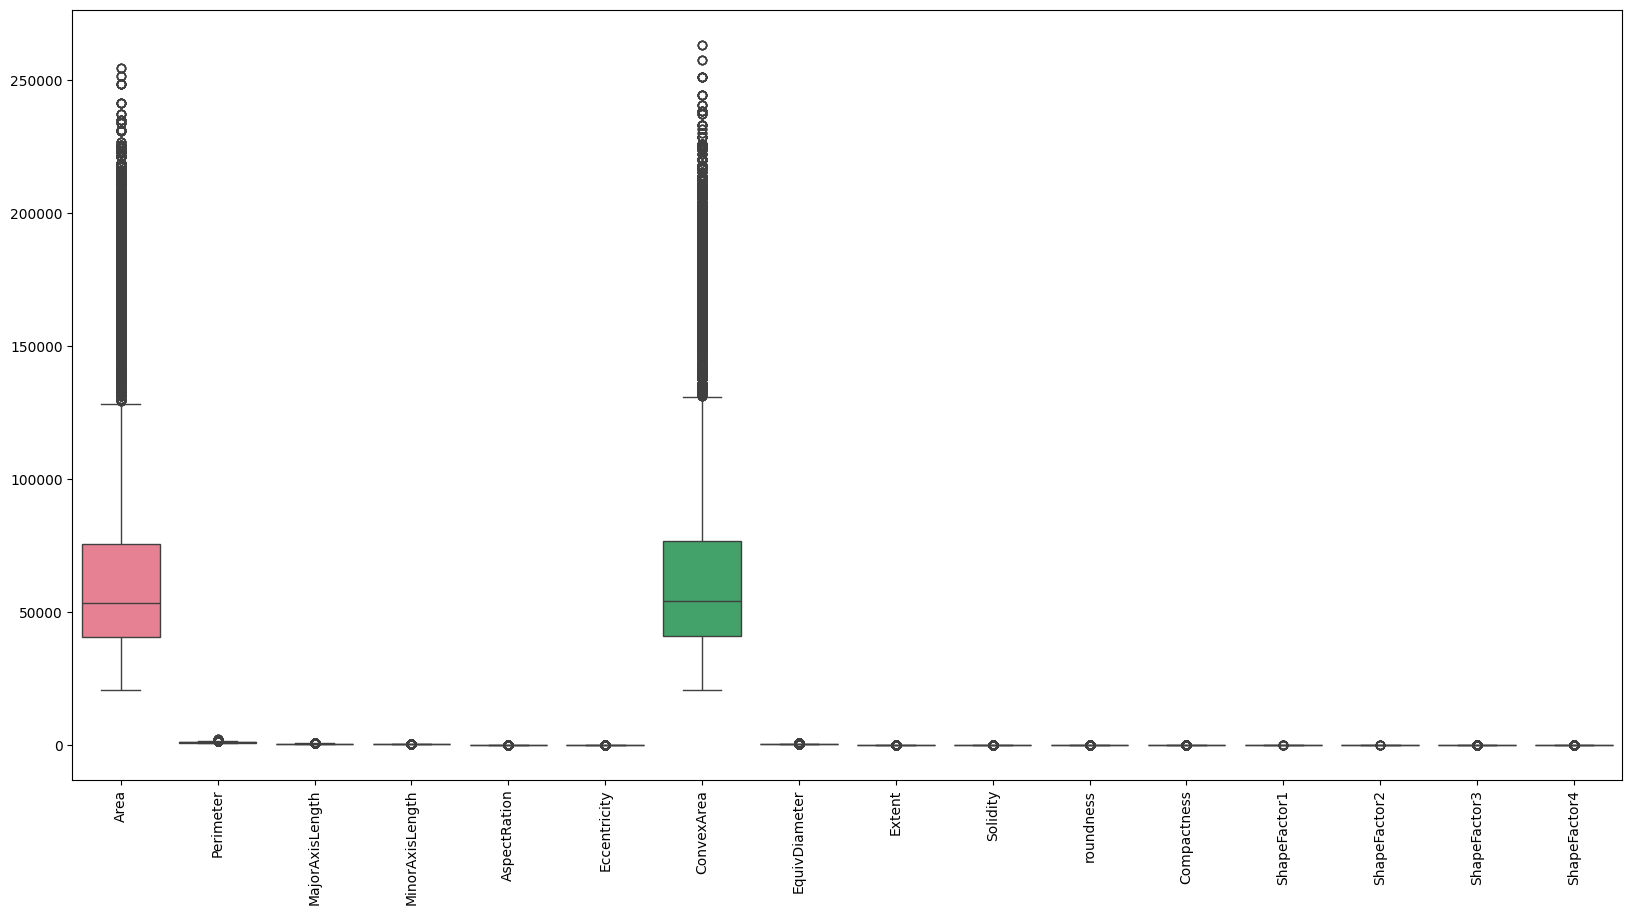

In [81]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data = data_resampled.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

There are outliers present in the dataset. We have treat the them. Here am using the capping method using IQR.

In [82]:
def count_outliers_iqr(df):
    outlier_count = 0  # Initialize counter for total outliers

    for col in df.columns:
        if df[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            num_outliers = outliers.shape[0]
            outlier_count += num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    return outlier_count

# Exclude the target column 'Class' while checking for outliers
total_outliers = count_outliers_iqr(data_resampled.drop(columns='Class'))

print(f"\nTotal number of outliers in the dataset: {total_outliers}")


Feature: Area | Outliers: 3524
Feature: Perimeter | Outliers: 1895
Feature: MajorAxisLength | Outliers: 1260
Feature: MinorAxisLength | Outliers: 3516
Feature: AspectRation | Outliers: 680
Feature: Eccentricity | Outliers: 1801
Feature: ConvexArea | Outliers: 3519
Feature: EquivDiameter | Outliers: 3072
Feature: Extent | Outliers: 559
Feature: Solidity | Outliers: 1102
Feature: roundness | Outliers: 171
Feature: Compactness | Outliers: 234
Feature: ShapeFactor1 | Outliers: 28
Feature: ShapeFactor2 | Outliers: 13
Feature: ShapeFactor3 | Outliers: 476
Feature: ShapeFactor4 | Outliers: 1094

Total number of outliers in the dataset: 22944


In [83]:
def cap_outliers_iqr(df):
    df_capped = df.copy()  # Create a copy of the dataframe
    
    for col in df.columns:
        if df[col].dtype != 'object':  # Only cap numeric columns
            Q1 = np.percentile(df[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Cap values below the lower bound to the lower bound
            df_capped[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            
            # Cap values above the upper bound to the upper bound
            df_capped[col] = np.where(df[col] > upper_bound, upper_bound, df_capped[col])
    
    return df_capped

# Assuming your resampled data is stored in 'data_resampled' and 'Class' is the target column
capped_data = cap_outliers_iqr(data_resampled.drop(columns='Class'))

# Now 'capped_data' contains the data with outliers capped.


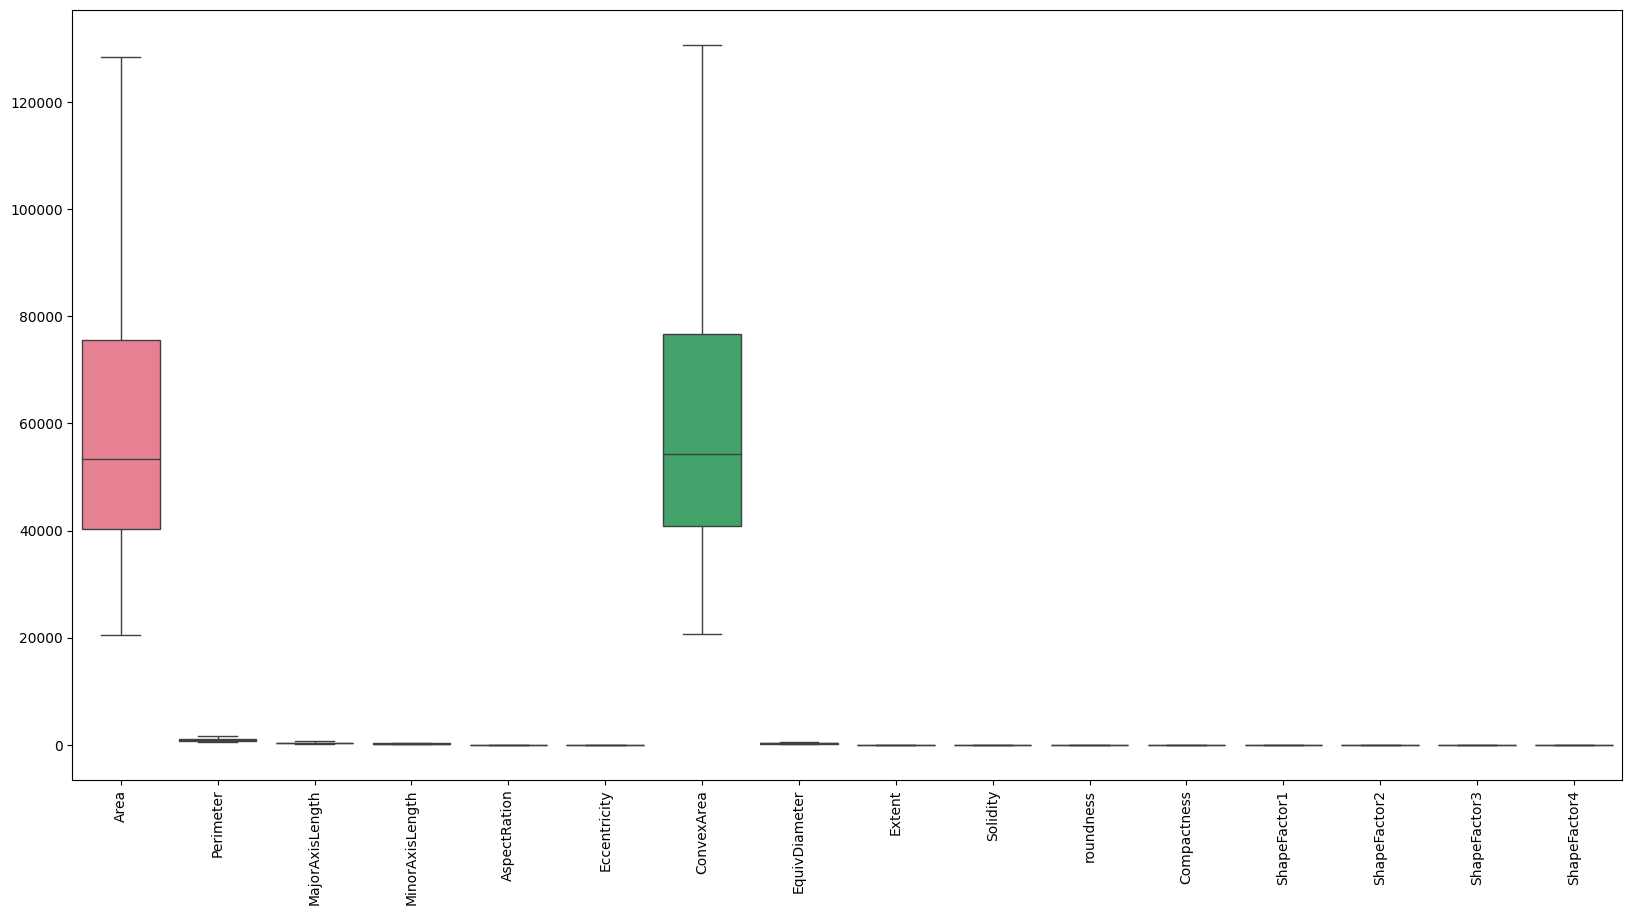

In [84]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data = capped_data.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

Bivariate Analysis

- Correlation Matrix

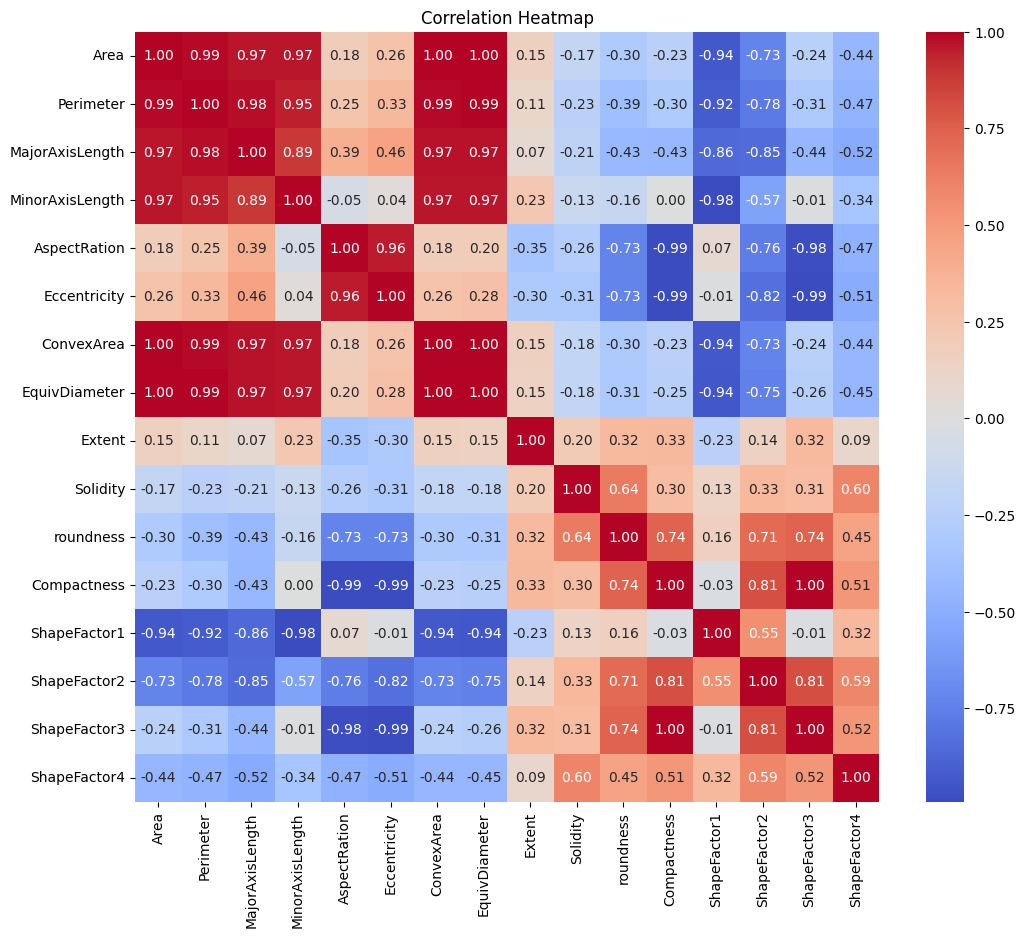

In [98]:
# Exclude non-numeric columns, such as 'Class'
numeric_data = capped_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = capped_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

From the above correlation matrix, we can see that some features are highly correlated to each other. This exist because some fetaures are calculated using another feature in the dataset.

Listed below the highly correlated features:

In [155]:
import pandas as pd

# Assuming `capped_data` is your DataFrame excluding the target column
# Calculate the correlation matrix
correlation_matrix = capped_data.corr()

# Set the thresholds for high correlation
lower_threshold_positive = 0.97
upper_threshold_positive = 1.0
lower_threshold_negative = -1.0
upper_threshold_negative = -0.97

# Find pairs of features with correlation between 0.97 and 1, or -1 and -0.97
high_correlation = correlation_matrix[
    ((correlation_matrix >= lower_threshold_positive) & (correlation_matrix < upper_threshold_positive)) |
    ((correlation_matrix <= upper_threshold_negative) & (correlation_matrix > lower_threshold_negative))
]

# Print the feature names and their correlations in a descriptive format
for feature_1, feature_2, correlation in high_correlation.stack().reset_index().values:
    print(f"The correlation between {feature_1} and {feature_2} is {correlation:.2f}.")



The correlation between Area and Perimeter is 0.99.
The correlation between Area and ConvexArea is 1.00.
The correlation between Area and EquivDiameter is 1.00.
The correlation between Perimeter and Area is 0.99.
The correlation between Perimeter and MajorAxisLength is 0.98.
The correlation between Perimeter and ConvexArea is 0.99.
The correlation between Perimeter and EquivDiameter is 0.99.
The correlation between MajorAxisLength and Perimeter is 0.98.
The correlation between MajorAxisLength and EquivDiameter is 0.97.
The correlation between MinorAxisLength and ShapeFactor1 is -0.98.
The correlation between AspectRation and Compactness is -0.99.
The correlation between AspectRation and ShapeFactor3 is -0.98.
The correlation between Eccentricity and Compactness is -0.99.
The correlation between Eccentricity and ShapeFactor3 is -0.99.
The correlation between ConvexArea and Area is 1.00.
The correlation between ConvexArea and Perimeter is 0.99.
The correlation between ConvexArea and Equi

Now, we trying to reduce the multicollinearity using the PCA Technique.
This feature will give the uncorrelated features.

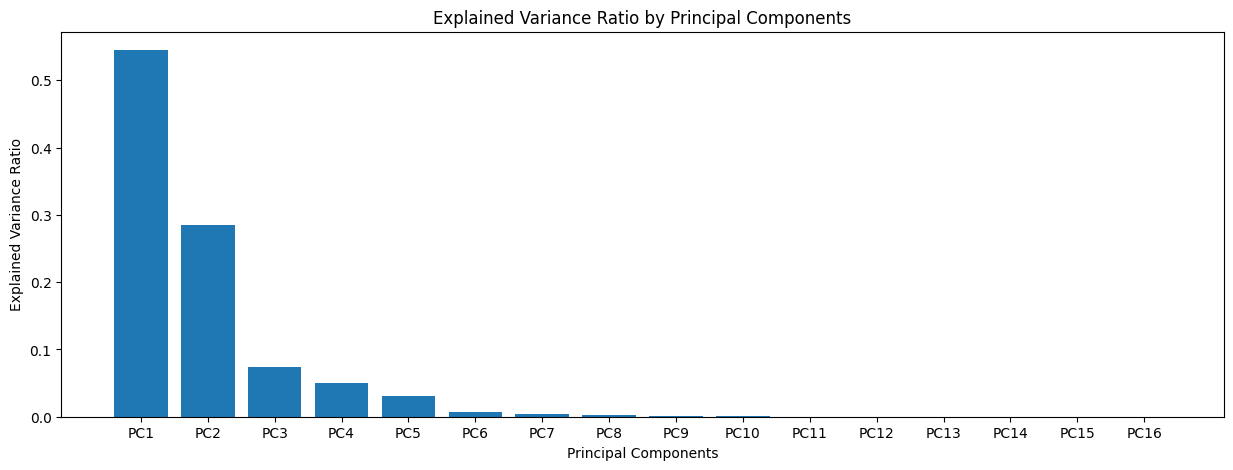

In [103]:
# Exclude 'Class' from capped_data to get the feature matrix
X = capped_data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA on the standardized data
pca = PCA(random_state=22)
pca.fit(X_scaled)

# Get the loadings and explained variance ratio
loadings = pca.components_

# Number of principal components
num_pc = pca.n_components_

# Create a list for PC labels (PC1, PC2, ..., PCn)
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]

# Step 3: Plot the explained variance ratio for each principal component
f, ax = plt.subplots(figsize=(15, 5))
plt.bar(x=pc_list, height=pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()++

In [105]:
# Fit PCA with the first 10 principal components
pca = PCA(n_components=10, random_state=22)
X_pca = pca.fit_transform(X_scaled)  # X_scaled is the standardized data (excluding 'Class')

# Create a DataFrame using the first 10 principal components
pc_columns = ["PC" + str(i) for i in range(1, 11)]
df_pca = pd.DataFrame(X_pca, columns=pc_columns)

# Optionally, add the 'Class' column back to the DataFrame if you need it for classification
#df_pca['Class'] = capped_data['Class'].values

# Display the first few rows of the new DataFrame
print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -5.497756 -1.987045 -0.699247 -0.187656 -0.206760  0.010061  0.668136   
1 -5.347307 -2.216211 -1.930214  0.137313  0.788657 -0.374520  0.783551   
2 -5.322657 -2.016839 -0.467724  0.020997  0.006216 -0.133530  0.616115   
3 -4.653173 -1.764325 -3.693442  0.703730  0.243743  0.433777  0.721721   
4 -5.829050 -2.972214 -0.440230 -0.220041 -0.403532 -0.024612  0.441720   

        PC8       PC9      PC10  
0  0.152846  0.110499  0.159765  
1 -0.171120  0.433701  0.434795  
2  0.156251  0.061454  0.103703  
3  0.265781  0.215198  0.245830  
4 -0.059210  0.479501  0.501097  


7. **Feature Engineering:**
     In the dataset, the features are all numerical values except target column.
   

8. **Feature Selection:**
       According to the nature of this dataset, it shows highcorrelation between the independent features. So, here I have already used the PCA methods to reduce the correlation among them and create the dataframe using 10 components that explained the total variance.

9. **Split Data into Training and Testing Sets:**
    - Divide the dataset into training and testing subsets.


In [106]:
# Assuming 'data_resampled' is the dataset that still contains the 'Class' column
df_pca['Class'] = data_resampled['Class'].values

In [108]:
# Define features (first 10 principal components) and the target (Class)
X = df_pca.drop('Class', axis=1)  # Features are the 10 principal components
y = df_pca['Class']               # Target is the Class column

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the training and testing sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (17375, 10), (17375,)
Testing set: (7447, 10), (7447,)


10. **Feature Scaling:**        To apply the PCA, we need to Standardise the data.
    So, that we already done in the previous step.


11. **Model Building:**


The following algorithms used for prediction;
1. Logistic Regression (LogisticRegression)
2. Support Vector Machine (SVC)
3. Random Forest Classifier (RandomForestClassifier)
4. K-Nearest Neighbors (KNeighborsClassifier)
5. Gradient Boosting Classifier (GradientBoostingClassifier)
   

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [110]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [111]:
# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print confusion matrix
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print('-' * 50)

Training Logistic Regression...
Logistic Regression Accuracy: 0.9359

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.93      0.94      1086
      BOMBAY       1.00      1.00      1.00      1072
        CALI       0.93      0.94      0.93      1069
    DERMASON       0.90      0.90      0.90      1066
       HOROZ       0.96      0.95      0.95      1052
       SEKER       0.95      0.96      0.95      1017
        SIRA       0.87      0.88      0.87      1085

    accuracy                           0.94      7447
   macro avg       0.94      0.94      0.94      7447
weighted avg       0.94      0.94      0.94      7447

Logistic Regression Confusion Matrix:
[[1006    0   57    0    1    6   16]
 [   0 1072    0    0    0    0    0]
 [  35    0 1007    0   20    3    4]
 [   0    0    0  964    4   18   80]
 [   7    0   15   15  995    0   20]
 [   7    0    0   12    0  973   25]
 [   6    0    8   79   

In [127]:
# Print metrics
print(f"{name} Accuracy: {accuracy:.4f}")
print("*********************************")

Training Logistic Regression...
Logistic Regression Accuracy: 0.9370
*********************************
Training SVM...
SVM Accuracy: 0.9438
*********************************
Training Random Forest...
Random Forest Accuracy: 0.9700
*********************************
Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.9408
*********************************
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9501
*********************************


13. **Hyperparameter Tuning:**
    - After analyzing the scores, the data shows a good accuracy. And the best model is acciording to the ML Algorithm is 
RandomForestClassifier.

14. **Save the Model:**
    - Save the trained model for future use.


In [128]:
import joblib

In [130]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)  # Train the model


RandomForestClassifier()

In [131]:
joblib.dump(rf_model, 'random_forest_classifier.joblib')

['random_forest_classifier.joblib']

15. **Test with Unseen Data:**
    - Assess the model's performance on unseen data.


In [3]:
df = pd.read_excel("Dry_Been_Unseendata.xlsx")

In [4]:
df.head(10)

,Area,Perimeter,MajorAxislength,MinorAxisLength,Equivalent Diameter,AspectRatio,Eccentricity,ConvexArea,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,24654.0,799,235,135,177.218423,1.740741,0.35,26000.0,0.65,0.948231,0.485047,0.754121,0.009532,0.005476,0.568698,0.032083
1,24960.0,755,245,160,178.314829,1.531250,0.45,24711.8,0.63,1.010044,0.549972,0.727816,0.009816,0.006410,0.529716,0.024535
2,24470.0,724,256,150,176.555868,1.706667,0.43,24565.0,0.64,0.996133,0.586336,0.689671,0.010462,0.006130,0.475647,0.024018
3,23735.0,635,345,145,173.884067,2.379310,0.55,24700.0,0.68,0.960931,0.739318,0.504012,0.014535,0.006109,0.254028,0.016170
4,23643.0,644,350,132,173.546741,2.651515,0.65,23645.0,0.71,0.999915,0.716012,0.495848,0.014804,0.005583,0.245865,0.017757
5,23318.3,710,360,200,172.350923,1.800000,0.48,24520.4,0.72,0.950976,0.580992,0.478753,0.015439,0.008577,0.229204,0.012562
6,22993.6,785,410,245,171.146750,1.673469,0.52,24711.8,0.52,0.930470,0.468659,0.417431,0.017831,0.010655,0.174249,0.009955
7,22668.9,795,425,265,169.934045,1.603774,0.42,24711.8,0.55,0.917331,0.450491,0.399845,0.018748,0.011690,0.159876,0.008992
8,22344.2,650,450,275,168.712623,1.636364,0.32,25094.6,0.59,0.890399,0.664244,0.374917,0.020139,0.012307,0.140563,0.006691
9,23000.0,632,460,250,171.170567,1.840000,0.36,25286.0,0.79,0.909594,0.723241,0.372110,0.020000,0.010870,0.138466,0.007001


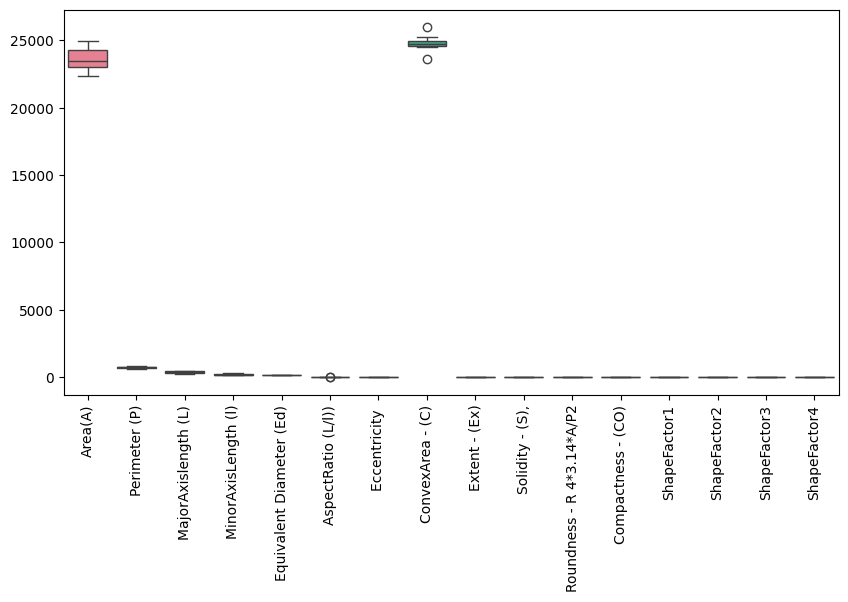

In [158]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (10,5))
sns.boxplot(data = df.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

This file doesn't have that much Outliers

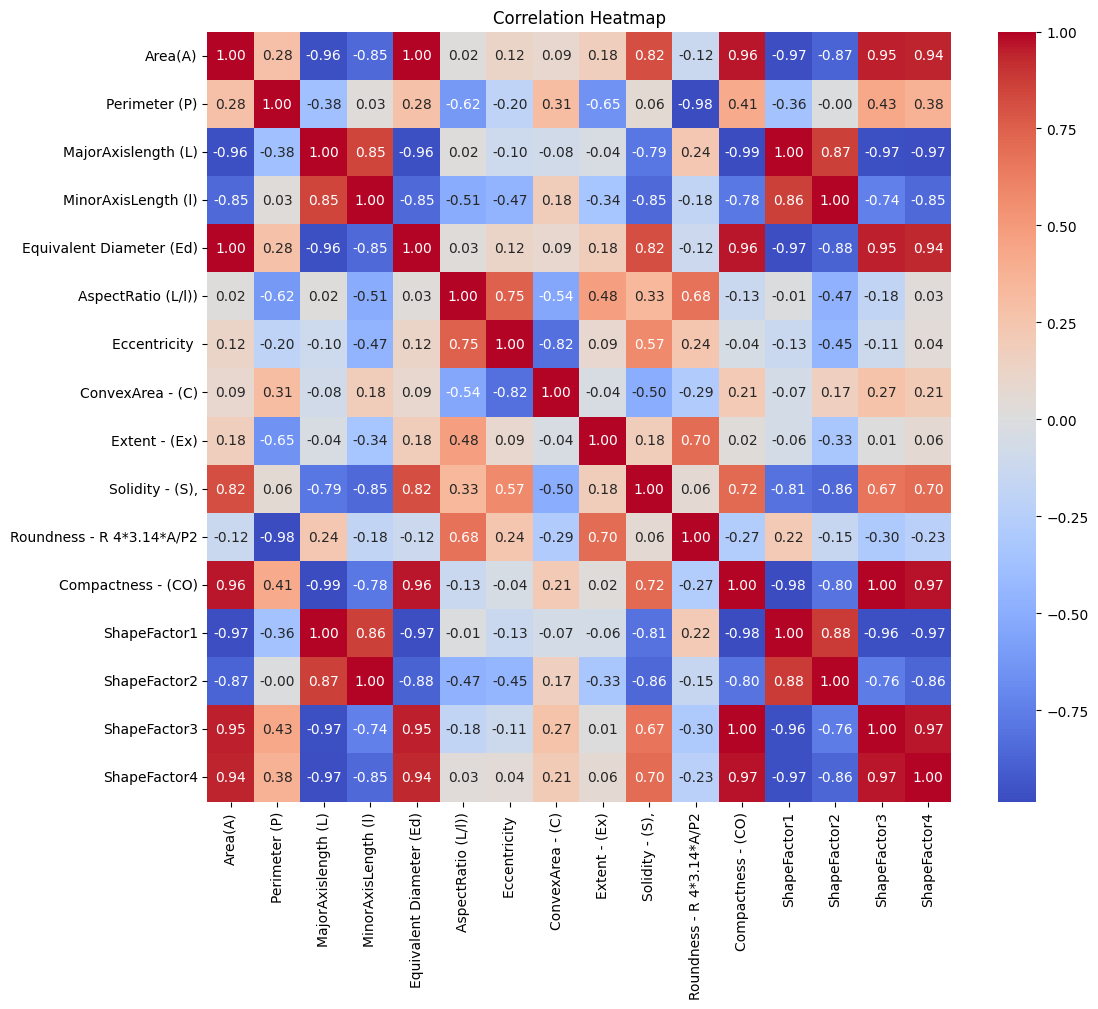

In [145]:
corr_matrix = df.corr()
corr_matrix
# Plot the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Applying the PCA to reduce the multicollinearity

In [146]:
# Exclude 'Class' from capped_data to get the feature matrix
X = df

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

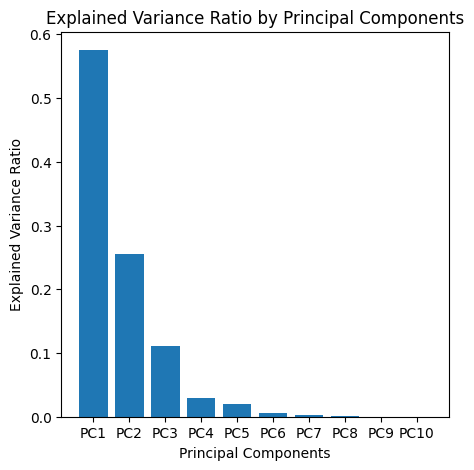

In [148]:
# Step 2: Fit PCA on the standardized data
pca = PCA(random_state=22)
pca.fit(X_scaled)

# Get the loadings and explained variance ratio
loadings = pca.components_

# Number of principal components
num_pc = pca.n_components_

# Create a list for PC labels (PC1, PC2, ..., PCn)
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]

# Step 3: Plot the explained variance ratio for each principal component
f, ax = plt.subplots(figsize=(5, 5))
plt.bar(x=pc_list, height=pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

In [151]:
# Fit PCA with the first 6 principal components
pca = PCA(n_components=10, random_state=22)
X_pca = pca.fit_transform(X_scaled)  

# Create a DataFrame using the first 10 principal components
pc_columns = ["PC" + str(i) for i in range(1, 11)]
df_pca = pd.DataFrame(X_pca, columns=pc_columns)

# Display the first few rows of the new DataFrame
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -4.238089 -2.581085  1.383809  1.315285  0.193953 -0.151634  0.050027   
1 -4.105367 -1.042069 -0.267567 -1.151878 -0.116099  0.373044  0.103531   
2 -3.350499 -0.315741 -0.036796 -0.786807 -0.381665 -0.277455 -0.049741   
3 -0.667474  2.656768  0.370435  0.743798 -0.533986  0.372749 -0.208520   
4 -1.121196  4.224934 -1.244440  0.282551  0.071658 -0.282351  0.249749   

        PC8       PC9          PC10  
0  0.041418 -0.002193 -1.835235e-16  
1  0.028498 -0.037228 -1.835235e-16  
2 -0.070921  0.052173 -1.835235e-16  
3 -0.112682 -0.012824 -1.835235e-16  
4  0.070959 -0.001853 -1.835235e-16  


In [ ]:
#Predicting the class
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)  # Train the model

In [153]:
y_pred

array(['DERMASON', 'DERMASON', 'DERMASON', 'SIRA', 'BARBUNYA', 'BARBUNYA',
       'BARBUNYA', 'BARBUNYA', 'BOMBAY', 'CALI'], dtype=object)

16. **Interpretation of Results (Conclusion):**
    
      - The score consistency between these four metrics suggests that the models are making predictions with a high level of consistency across all classes.
      - Bombay beans were completely accurately classified across all models.
      - Sira and Dermason beans were consistently misclassified as each other in all models, implying a degree of commonality among their characteristics.
      - Similarly, Cali and Barbunya beans may have homogeneous features since most models misidentified them as one another, albeit less so than with Sira and Dermason beans. .


17. **Future Work:**
    
    In this analysis, I have used the Data resampling Technique and PCA Method to overcome the imbalancing and the multicollinearity respectively.
    There is another method to  validate the evenness of the attribute variation between classes to determine whether oversampling or undersampling techniques are required.
    
    - Sample Validation
     
        Despite the imbalanced sample sizes for the classes, the data can be proven valid if the classes are evenly varied. By calculating each attribute’s mean and standard deviation per class, I derived and compared their respective coefficient of variation (CV).
      
    - And without doing PCA, Apply methods for feature selection  for selecting the best features.